In [1]:
import matplotlib.pyplot as plt

import torchvision as tv
from torchvision import transforms, utils


import torch.nn.functional as F
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
# from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# import numpy as np
import torch.optim as optim
# import os
import time

import loadData

In [2]:
# 日志记录模块
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("../logs/3_FFT/log1245_2.txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

console = logging.StreamHandler()
console.setLevel(logging.INFO)

logger.addHandler(handler)
logger.addHandler(console)

In [3]:
startTime = time.time()

In [4]:
transforms = tv.transforms.Compose([
    transforms.ToTensor(),
])


numOfBatch = 9
pixel = 64
flag = 0
root = f'./{numOfBatch}/data'
batchSize = 2
train_data = loadData.MyDataset(txt=f'files_train.txt', transform=None)
test_data = loadData.MyDataset(txt=f'files_test.txt', transform=None)


train_loader = DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_data, batch_size=batchSize, shuffle=False, num_workers=2)


# print(train_loader)
# print(test_loader)

In [5]:
train_loader

In [6]:
data = iter(train_loader)

# print(type(data))
# print(len(data))
data_, label = data.next()
print(train_loader.batch_size)
print(data_, label)

2
tensor([[[100.1017,  55.8233,  57.8449,  ...,  69.6233,  56.9469,  62.0440],
         [ 69.1526,  73.6959,  74.5406,  ...,  81.7883,  72.0185,  70.3657],
         [ 70.4255,  84.2233,  80.4508,  ...,  77.3802,  80.6033,  69.8493],
         ...,
         [ 35.8791,  27.4609,  31.4408,  ...,  36.7632,  43.3120,  45.1508],
         [ 33.5075,  30.0976,  42.3517,  ...,  38.3451,  44.6569,  30.6130],
         [ 31.8397, -22.7078,  35.1203,  ...,  53.7869,  57.8287,  52.6335]],

        [[ 82.6983,  62.3384,  72.9038,  ...,  74.5470,  69.5270,  67.5709],
         [ 69.5028,  76.3601,  57.3593,  ...,  63.7361,  62.6792,  69.8894],
         [ 75.9552,  64.4860,  68.7780,  ...,  81.0481,  72.3143,  56.8148],
         ...,
         [ 54.0702,  45.7510,  41.8063,  ...,  30.0762,  12.3916,  43.5252],
         [ 13.5403,  32.0266,  34.6901,  ...,  23.9883,  31.8701,  29.1849],
         [ 38.1031,  38.4712,  45.3647,  ...,  48.0109,  47.1059,  51.8098]]],
       dtype=torch.float64) tensor([47, 37

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=160, out_channels=120, kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=120, out_channels=100, kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=100, out_channels=80, kernel_size=2)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        
#         self.fc1 = nn.Linear(1360, 1024)
        self.fc1 = nn.Linear(15760, 10240)
        self.fc2 = nn.Linear(10240, 1000)
        self.fc3 = nn.Linear(1000, 54)

    def forward(self, x):
        x = self.conv1(x)
#         x = F.elu(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 1)
        x = self.conv2(x)
#         x = F.elu(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 1)
        x = self.conv3(x)
#         x = F.elu(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 1)
        x = torch.flatten(x, 1)
#         print("x的大小为:", x.shape)
        x = self.fc1(x)
#         x = F.elu(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
#         x = F.elu(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [8]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)

epochs = 20
average_loss_series = []

In [9]:
for a, b in enumerate(train_loader):
    inputs, labels = b
    print(inputs)
    break

tensor([[[101.7376,  60.6345,  67.5346,  ...,  66.8874,  75.7847,  72.9950],
         [ 67.8376,  61.9017,  75.0352,  ...,  82.9625,  79.3689,  77.3234],
         [ 75.9514,  79.5781,  66.1653,  ...,  81.5693,  83.7691,  76.9103],
         ...,
         [ 30.4906,  17.2873,  40.4883,  ...,  44.7874,  40.3160,  43.7482],
         [ 49.4970,  32.4264,  36.6742,  ...,  43.5477,  53.5062,  45.3610],
         [ 31.0219,  17.6717,  33.6348,  ...,  35.5412,  27.1661,  47.5038]],

        [[119.0074,  38.7226,  45.7735,  ...,  56.2656,  78.5664,  64.4812],
         [ 68.5517,  64.3462,  80.4924,  ...,  81.3523,  73.7857,  81.8344],
         [ 74.6672,  73.3813,  73.1498,  ...,  81.6539,  77.9122,  66.2774],
         ...,
         [ 49.3209,  37.5057,  21.4780,  ...,  39.1005,  36.1552,  40.4839],
         [ 35.0718,  29.2590,  31.4798,  ..., -10.4539,  38.6690,  31.1216],
         [ 30.1468,   2.1288,  25.5411,  ...,  37.3774,  37.8630,  39.4163]]],
       dtype=torch.float64)


In [10]:
# s = torch.randn(2, 160,20).double()
# conv = nn.Conv1d(in_channels=160, out_channels=120, kernel_size=2)
# conv(s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[1, 10] loss: 4.326939702033997
[1, 10] acc: 0.0
[1, 20] loss: 4.169846105575561
[1, 20] acc: 0.0
[1, 30] loss: 4.03149197101593
[1, 30] acc: 0.0
[1, 40] loss: 4.019922423362732
[1, 40] acc: 0.0
[1, 50] loss: 3.98690288066864
[1, 50] acc: 0.0
[1, 60] loss: 3.987872314453125
[1, 60] acc: 0.10000000149011612
[1, 70] loss: 3.9937594652175905
[1, 70] acc: 0.0
[1, 80] loss: 3.996001124382019
[1, 80] acc: 0.0
[1, 90] loss: 3.9979846477508545
[1, 90] acc: 0.0
[1, 100] loss: 3.993028163909912
[1, 100] acc: 0.0
[2, 10] loss: 3.989285039901733
[2, 10] acc: 0.0
[2, 20] loss: 3.9884134769439696
[2, 20] acc: 0.0
[2, 30] loss: 3.9880380630493164
[2, 30] acc: 0.0
[2, 40] loss: 3.9855886459350587
[2, 40] acc: 0.0
[2, 50] loss: 3.9863218784332277

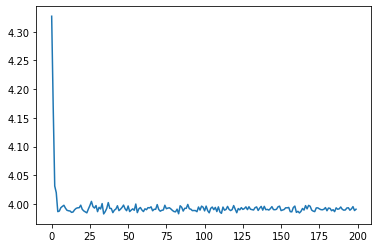

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/opt/conda/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.

In [11]:
%matplotlib inline

torch.cuda.set_device(1)

if __name__ == '__main__':
    for epoch in range(epochs):
        running_loss = 0.0
        running_acc = 0.0

        for i, data in enumerate(train_loader):
#             print("i:", i )
#             print("data: ", data)
            inputs, labels = data
            optimizer.zero_grad()

            inputs = inputs.permute(0, 2, 1)
            inputs = torch.tensor(inputs, dtype=torch.float32)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, dim=1)
            total = labels.size(0)
#             print('原来的值:{0}, 预测的值:{1}'.format(labels, predicted))
            running_correct = (predicted == labels).sum()
            running_acc += running_correct
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

            # 每loopNum个batch打印一次训练状态
            loopNum = 10
            if i % loopNum == loopNum - 1:
                average_loss = running_loss / loopNum
                logger.info('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
                running_acc = running_acc.float()
                average_acc = running_acc / loopNum / total
                
                logger.info('[{0}, {1}] acc: {2}'.format(epoch + 1, i + 1, average_acc))
                average_loss_series.append(average_loss)
                running_loss = 0.0
                running_acc = 0.0

    x = range(0, len(average_loss_series))
    plt.figure()
    plt.plot(x, average_loss_series)
    plt.show()
    # %%
    # 在测试集上测试
    realLabel = []
    predictedLabel = []


    def correct_rate(net, testloader):
        correct = 0.0
        total = 0.0

        for data in testloader:
            images, labels = data
            realLabel.append([int(label) for label in labels])
            images = images.permute(0, 2, 1).float()
#             print("--------!!---------", images)
#             print(images.shape)
            outputs = net(images)

            _, predicted = torch.max(outputs.data, dim=1)
            predictedLabel.append([int(label) for label in predicted])
            total += labels.size(0)
            correct += (predicted == labels).sum()
#             print("predicted的值为：" , predicted)
#             print("labels的值为：" , labels)
#             print("correct的值为:", correct)
            
        logger.info("total的值为：",total)
#         return 100 * correct  # / total
        return 100 * correct/ total 


    correct = correct_rate(net, test_loader)
    logger.info(f'{len(test_loader) * 3}张测试集中准确率为： {correct}%')

    # %%
    import itertools
    from sklearn.metrics import confusion_matrix

    realLabel = list(itertools.chain.from_iterable(realLabel))
    predictedLabel = list(itertools.chain.from_iterable(predictedLabel))

    cm = confusion_matrix(realLabel, predictedLabel)
    logger.info(cm)

    logger.info('the running time is', time.time() - startTime)
    torch.save(net, f'./models/model_{pixel}_{flag}.pkl')


In [12]:
aa = iter(train_loader)
a, b = aa.next()
print(a[0].shape)
print(a)

torch.Size([200, 160])
tensor([[[114.8635,  53.7170,  54.1345,  ...,  66.4987,  66.0018,  63.0430],
         [ 78.2645,  73.8204,  80.4597,  ...,  69.8243,  67.0824,  72.3500],
         [ 71.2418,  61.9769,  71.5587,  ...,  80.6447,  74.0133,  83.4610],
         ...,
         [ 26.0847,  33.3075,  41.8790,  ...,  39.8342,   2.0055,  14.8659],
         [ 10.7406,  40.1899,  34.4572,  ...,  30.7469,  42.7602,  26.4300],
         [ 36.2007,  44.9455,  25.5890,  ...,  52.6809,  44.0778,  54.4768]],

        [[106.4474,  57.1122,  60.3718,  ...,  65.1443,  70.3911,  66.2836],
         [ 68.7080,  60.1271,  76.1401,  ...,  77.3631,  83.2034,  77.8877],
         [ 78.8480,  75.8316,  74.1144,  ...,  83.1688,  83.6603,  82.8401],
         ...,
         [ 51.1821,  52.6012,  45.0722,  ...,  36.0835,  47.2467,  50.2479],
         [ 32.8645,  37.7470,  24.4560,  ...,  41.3178,  39.7315,  41.7508],
         [  8.7072,  44.8429,  46.6405,  ...,  27.7683,  43.4634,  46.7276]]],
       dtype=torch.fl